In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_lossdata(file):
    print('Loading ', file)
    df_loss = pd.read_csv(file,  skiprows = 4, skipfooter = 4, header = 5, engine = 'python')

    return df_loss

In [3]:
df = pd.read_csv('../../results/Overview_models.csv')
df1 = df[['Name', 'notes']]
pd.set_option("max_colwidth", None)
display(df1)

,Name,notes
0,Temporal4DFlowNet_20230210-0333,NaN
1,Temporal4DFlowNet_20230215-1029,NaN
2,Temporal4DFlowNet_20230217-0602,NaN
3,Temporal4DFlowNet_20230220-0908,NaN
4,Temporal4DFlowNet_20230301-1127,First training on radial sampled data
...,...,...
107,Temporal4DFlowNet_20240807-1745,"CS data (more noise 14-17db + include first two frames), HR: original CFD, LR: CFD to MR pipeline, also train on models 2,3,5,6 with invivo magn, note validation=test set, fixed loss"
108,Temporal4DFlowNet_20240827-1704,"CS data (more noise 14-17db + include first two frames), HR: original CFD, LR: CFD to MR pipeline, also train on models 2,3,5,6 with invivo magn, note validation=test set, fixed loss, lr decay (50 epochs)"
109,Temporal4DFlowNet_20240827-1709,"CS data (more noise 14-17db + include first two frames), HR: original CFD, LR: CFD to MR pipeline, also train on models 2,3,5,6 with invivo magn, note validation=test set, fixed loss, alpha = 0.5"
110,Temporal4DFlowNet_20240827-1711,"CS data (more noise 14-17db + include first two frames), HR: original CFD, LR: CFD to MR pipeline, also train on models 2,3,5,6 with invivo magn, note validation=test set, fixed loss, alpha = 0.9"


Loading  ../../models/Temporal4DFlowNet_20240709-2057/loss.csv
Loading  ../../models/Temporal4DFlowNet_20240827-1704/loss.csv
Loading  ../../models/Temporal4DFlowNet_20240827-1709/loss.csv
Loading  ../../models/Temporal4DFlowNet_20240827-1711/loss.csv
Loading  ../../models/Temporal4DFlowNet_20240827-1713/loss.csv


/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same argument

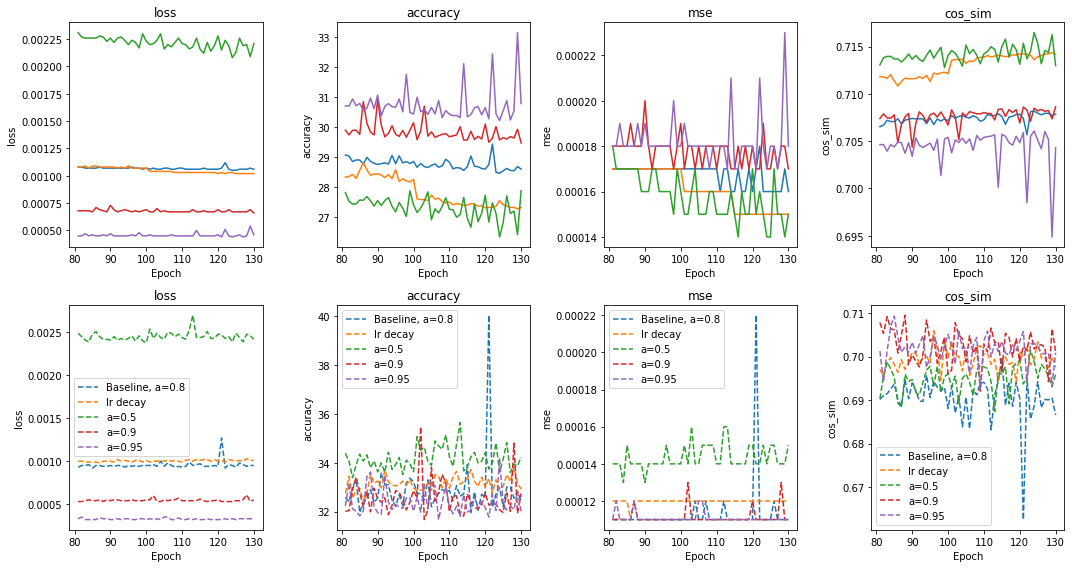

In [7]:
model_names  = ['Temporal4DFlowNet_20240709-2057', 'Temporal4DFlowNet_20240827-1704', 'Temporal4DFlowNet_20240827-1709', 'Temporal4DFlowNet_20240827-1711', 'Temporal4DFlowNet_20240827-1713']
descriptions = ['Baseline, a=0.8', 'lr decay', 'a=0.5', 'a=0.9', 'a=0.95']

plotting_metrics = ['loss', 'accuracy',	'mse', 'cos_sim']
N_metrics = len(plotting_metrics)

show_epochs = np.index_exp[80::]


def load_lossdata(file):
    print('Loading ', file)
    df_loss = pd.read_csv(file,  skiprows = 4, skipfooter = 4, engine = 'python')

    return df_loss


plt.figure(figsize=(15, 8))

for i, model_name in enumerate(model_names):
    df_loss = load_lossdata('../../models/' + model_name + '/loss.csv')
    df_loss.columns = df_loss.columns.str.strip()


    # make a plot for each metric
    for m, metric in enumerate(plotting_metrics):
        
        plt.subplot(2, N_metrics, m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'train_{metric}'][show_epochs], '-', label=descriptions[i], color='C'+str(i))
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'train {metric}')
        # plt.legend()
        plt.subplot(2, N_metrics, N_metrics+m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'val_{metric}'][show_epochs], '--', label=descriptions[i], color='C'+str(i))
        # plt.yscale('log')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'val {metric}')
        plt.legend()
plt.legend()
plt.tight_layout()